# Курсовой проект по курсу Python для DataScience

## 1. Подготовительная часть

### Импорт используемых библиотек

In [1370]:
# библиотеки общего назначения

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# функции для подготовки данных
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# функции для тренировки моделей
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# функции для измерения эффективности моделей
from sklearn.metrics import r2_score

### Настройка среды разработки

In [1371]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

### Импорт данных из файла

In [1372]:
data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### Первичный анализ данных

In [1373]:
data.info

<bound method DataFrame.info of          Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0     14038          35    2.0   47.981561   29.442751            6.0      7   
1     15053          41    3.0   65.683640   40.049543            8.0      7   
2      4765          53    2.0   44.947953   29.197612            0.0      8   
3      5809          58    2.0   53.352981   52.731512            9.0      8   
4     10783          99    1.0   39.649192   23.776169            7.0     11   
5     12915          59    3.0   80.384479   46.683720           12.0      5   
6     14549         154    2.0   62.254114   37.160377            7.0      3   
7     11993          74    2.0   80.312926         NaN            0.0     14   
8      5172           1    2.0   64.511437         NaN            1.0      9   
9      8649          23    1.0   46.461409   18.915552            8.0     13   
10    15370          28    2.0   46.304907   27.922584            6.0      8   
11    12

In [1374]:
data.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [1375]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

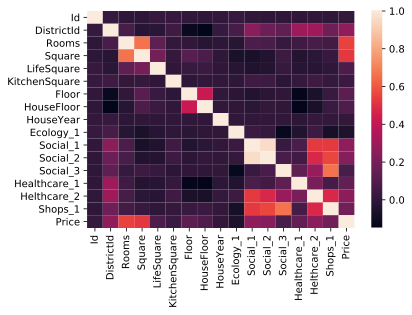

In [1376]:
sns.heatmap(data.corr())

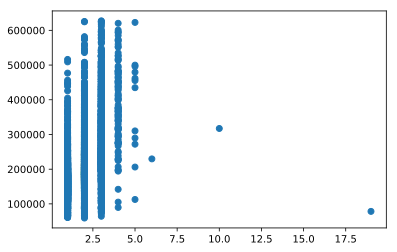

In [1377]:
plt.scatter(train['Rooms'], train['Price'])

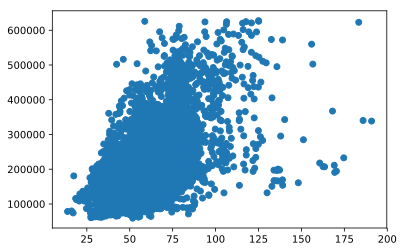

In [1378]:
plt.scatter(train['Square'], train['Price'])

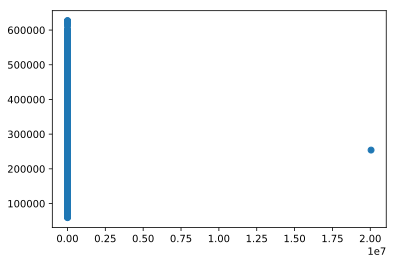

In [1379]:
plt.scatter(train['HouseYear'], train['Price'])

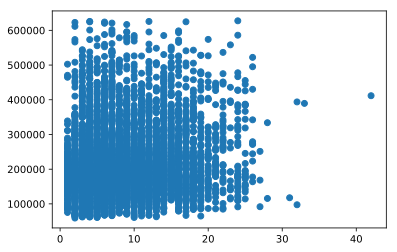

In [1380]:
plt.scatter(train['Floor'], train['Price'])

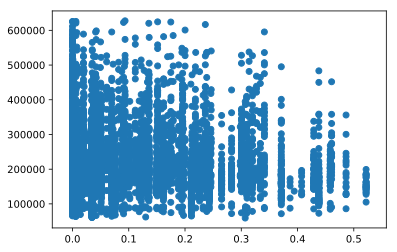

In [1381]:
plt.scatter(train['Ecology_1'], train['Price'])

### Вспомогательные функции для анализа данных

In [ ]:
# Функция строит графики корреляции признаков
def show_features(data):
    
    X_df, y_series = data.drop('Price', axis=1), data['Price']
    X_df = pd.get_dummies(X_df)
    plt.figure(figsize=(12, 8))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    
    for i, col in enumerate(X_df.columns):
        plt.subplot(4, 3, i+1 )
        plt.scatter(X_df[col], y_series)
        plt.title(col)

### Разбиение данных

In [ ]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

### Первичная обработка данных

In [ ]:
# Подготавливаем dummy переменные
def prepare_dummies(data):
    data['Helthcare_2'] = data['Helthcare_2'].astype('category')
    data = pd.get_dummies(data)
    return data

In [ ]:
### Обработка количества комнат

mean_square_1 = data.loc[data['Rooms'] == 1, 'Square'].mean()
mean_square_2 = data.loc[data['Rooms'] == 2, 'Square'].mean()
mean_square_3 = data.loc[data['Rooms'] == 3, 'Square'].mean()
mean_square_4 = data.loc[data['Rooms'] == 4, 'Square'].mean()
mean_square_5 = data.loc[data['Rooms'] == 5, 'Square'].mean()

def normilize_rooms(data):
    
    #Задаем количество комнат для указанных больше 5
    #основываясь на средних значениях площади для одно-, двух-, трех- и т.д. -комнатных квартир
    
    median_1_2 = (mean_square_1 + mean_square_2) / 2
    median_2_3 = (mean_square_2 + mean_square_3) / 2
    median_3_4 = (mean_square_3 + mean_square_4) / 2
    median_4_5 = (mean_square_4 + mean_square_5) / 2
    
    data.loc[(data['Rooms'] > 5) & (data['Square'] <= median_1_2), 'Rooms'] = 1
    data.loc[(data['Rooms'] > 5) & (data['Square'] > median_1_2) & (data['Square'] <= median_2_3), 'Rooms'] = 2
    data.loc[(data['Rooms'] > 5) & (data['Square'] > median_2_3) & (data['Square'] <= median_3_4), 'Rooms'] = 3
    data.loc[(data['Rooms'] > 5) & (data['Square'] > median_3_4) & (data['Square'] <= median_4_5), 'Rooms'] = 4
    data.loc[(data['Rooms'] > 5) & (data['Square'] > median_4_5), 'Rooms'] = 5
    
    #Задаем количество комнат исходя из данных о квадратуре, для 0-комнатных квартир
    
    data.loc[(data['Rooms'] == 0) & (data['Square'] <= median_1_2), 'Rooms'] = 1
    data.loc[(data['Rooms'] == 0) & (data['Square'] > median_1_2) & (data['Square'] <= median_2_3), 'Rooms'] = 2
    data.loc[(data['Rooms'] == 0) & (data['Square'] > median_2_3) & (data['Square'] <= median_3_4), 'Rooms'] = 3
    data.loc[(data['Rooms'] == 0) & (data['Square'] > median_3_4) & (data['Square'] <= median_4_5), 'Rooms'] = 4
    data.loc[(data['Rooms'] == 0) & (data['Square'] > median_4_5), 'Rooms'] = 5
    
    return data

In [ ]:
### Обработка площади
mean_price_1 = data.loc[data['Rooms'] == 1, 'Price'].mean()
mean_price_2 = data.loc[data['Rooms'] == 2, 'Price'].mean()
mean_price_3 = data.loc[data['Rooms'] == 3, 'Price'].mean()
mean_price_4 = data.loc[data['Rooms'] == 4, 'Price'].mean()
mean_price_5 = data.loc[data['Rooms'] == 5, 'Price'].mean()




def normalize_square(data):
    median_1_2 = (mean_price_1 + mean_price_2) / 2
    median_2_3 = (mean_price_2 + mean_price_3) / 2
    median_3_4 = (mean_price_3 + mean_price_4) / 2
    median_4_5 = (mean_price_4 + mean_price_5) / 2
    
    #Задаем площадь исходя из цены
    data.loc[(data['Square'] < 15) & (data['Price'] <= median_1_2), 'Square'] = mean_square_1
    data.loc[(data['Square'] < 15) & (data['Price'] > median_1_2) & (data['Price'] <= median_2_3), 'Square'] = mean_square_2
    data.loc[(data['Square'] < 15) & (data['Price'] > median_2_3) & (data['Price'] <= median_3_4), 'Square'] = mean_square_3
    data.loc[(data['Square'] < 15) & (data['Price'] > median_3_4) & (data['Price'] <= median_4_5), 'Square'] = mean_square_4
    data.loc[(data['Square'] < 15) & (data['Price'] > median_4_5), 'Square'] = mean_square_5
    
    return data  

In [ ]:
# Обработка жилой площади
mean_lsquare_1 = data.loc[data['Rooms'] == 1, 'LifeSquare'].mean()
mean_lsquare_2 = data.loc[data['Rooms'] == 2, 'LifeSquare'].mean()
mean_lsquare_3 = data.loc[data['Rooms'] == 3, 'LifeSquare'].mean()
mean_lsquare_4 = data.loc[data['Rooms'] == 4, 'LifeSquare'].mean()
mean_lsquare_5 = data.loc[data['Rooms'] == 5, 'LifeSquare'].mean()


def normilize_life_square(data):
    
    median_1_2 = (mean_lsquare_1 + mean_lsquare_2) / 2
    median_2_3 = (mean_lsquare_2 + mean_lsquare_3) / 2
    median_3_4 = (mean_lsquare_3 + mean_lsquare_4) / 2
    median_4_5 = (mean_lsquare_4 + mean_lsquare_5) / 2
    
    #Задаем жилую площадь исходя из средней для аналогичного количества комнат
    data.loc[(data['LifeSquare'].isnull()) & (data['Rooms'] == 1), 'LifeSquare'] = mean_lsquare_1
    data.loc[(data['LifeSquare'].isnull()) & (data['Rooms'] == 2), 'LifeSquare'] = mean_lsquare_2
    data.loc[(data['LifeSquare'].isnull()) & (data['Rooms'] == 3), 'LifeSquare'] = mean_lsquare_3
    data.loc[(data['LifeSquare'].isnull()) & (data['Rooms'] == 4), 'LifeSquare'] = mean_lsquare_4
    data.loc[(data['LifeSquare'].isnull()) & (data['Rooms'] == 5), 'LifeSquare'] = mean_lsquare_5
    
    return data  

In [ ]:
# Функция для удаления слабокоррелирующих с ценой столбцов

def drop_minor_columns(data, columns):
    for column in range(len(columns)):
        data = data.drop(columns[column], axis=1)
    return data

In [ ]:
# Функция для добавления средних значений в зависимости от района и количества комнат
mean_district_rooms_price = train.groupby(['DistrictId', 'Rooms'])['Price'].mean().reset_index().rename(columns={'Price': 'Mean_District_Rooms_Price'})
mean_rooms_price = train.groupby('Rooms')['Price'].mean().reset_index().rename(columns={'Price': 'Mean_Rooms_Price'})
mean_price = train['Price'].mean()


def add_means_value(data, mean_drp=mean_district_rooms_price, mean_rp=mean_rooms_price):
    data = pd.merge(data, mean_drp, on=['DistrictId', 'Rooms'], how='left')
    data = pd.merge(data, mean_rp, on='Rooms', how='left')
    
    data['Mean_Rooms_Price'] = data['Mean_Rooms_Price'].fillna(mean_price)
    data['Mean_District_Rooms_Price'] = data['Mean_District_Rooms_Price'].fillna(data['Mean_Rooms_Price'])
    return data

### Глобальные переменные

In [ ]:
# Признаки оторбранные для изучения
feats = ['Rooms', 'Square', 'HouseYear', 'Floor', 'Mean_District_Rooms_Price', 'Ecology_1', 
         'Ecology_2_A', 'Ecology_2_B','Helthcare_2_0', 'Helthcare_2_1','Helthcare_2_2','Helthcare_2_3',
         'Helthcare_2_4', 'Helthcare_2_5', 'Helthcare_2_6']


In [ ]:
def delete_bad_values(data):
    data = data.loc[(data['Square'] > 12) & (data['Square'] < 200), :]
    data = data.loc[data['Rooms'] != 0 , :]
    return data

In [ ]:
# Функция, собирающая все обрабатывающие функции
def prepare_data(data, forTest=False):
    if not forTest:
        data = delete_bad_values(data)
    data = prepare_dummies(data)
    #data = normilize_rooms(data)
    #data = normalize_square(data)
    data = add_means_value(data)
    #data = square_2(data)
    #data = healthcare_1_mean(data)
    #data = normilize_life_square(data)
    return data

### Подготовка данных

In [ ]:
train = prepare_data(train)
train.head()

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  14604          23    1.0   41.681380   22.796166            8.0     14   
1   5621          23    3.0  163.495333  161.504222           12.0      5   
2    235          87    1.0   39.710131   19.538663            8.0      4   
3  16258          48    3.0   96.056784   98.152802            1.0     15   
4  10773          77    3.0   79.195825   44.421062           10.0     16   

   HouseFloor  HouseYear  Ecology_1        ...         Helthcare_2_1  \
0        17.0       2015   0.075779        ...                     0   
1         3.0       1977   0.014073        ...                     0   
2        17.0       1986   0.100456        ...                     1   
3         1.0       2017   0.041125        ...                     1   
4        17.0       1984   0.298205        ...                     1   

   Helthcare_2_2  Helthcare_2_3  Helthcare_2_4  Helthcare_2_5  Helthcare_2_6  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Shops_2_A  Shops_2_B  Mean_District_Rooms_Price  Mean_Rooms_Price  
0          0          1              102427.030975     160134.810901  
1          0          1              165911.129700     290867.452543  
2          1          0              169596.630515     160134.810901  
3          0          1              382424.639356     290867.452543  
4          0          1              251751.766701     290867.452543  

[5 rows x 31 columns]

In [ ]:
valid = prepare_data(valid)

In [ ]:
# Обобощенная функция для тренировки моделей и получения предсказаний

def learning(model):
    
    model.fit(train.loc[:, feats], train['Price'])
    
    def predictor(data, estimate_data=False, estimator=False, feats=feats):
        prediction = model.predict(data.loc[:, feats])
        if estimator:
            estimate_value = estimator(estimate_data, prediction)
            print(f'R2: {estimate_value}')
        return prediction
    return predictor

### Тестирование разных моделей

### LinearRegression

In [ ]:
LR_model = LinearRegression()
LR_model = learning(LR_model)
pred_valid_LR = LR_model(valid, valid['Price'], r2_score)

R2: 0.6090745416698704


### Lasso

In [ ]:
LS_model = Lasso()
LS_model = learning(LS_model)
pred_valid_LS = LS_model(valid, valid['Price'], r2_score)

R2: 0.6090688998478282


### Ridge

In [ ]:
RG_model = Ridge()
RG_model = learning(RG_model)
pred_valid_RG = RG_model(valid, valid['Price'], r2_score)

R2: 0.6090648380353725


### DecisionTreeRegressor

In [ ]:
DTR_model = DTR(max_depth=15, random_state=42)
DTR_model = learning(DTR_model)
pred_valid_DTR = DTR_model(valid, valid['Price'], r2_score)

R2: 0.5218391073281294


### RandomForestRegressor

In [ ]:
RFR_model = RFR(n_estimators=1200, max_depth=14, random_state=42)
RFR_model = learning(RFR_model)
pred_valid_RFR = RFR_model(valid, valid['Price'], r2_score)

### GradientBoostingRegressor

In [ ]:
GBR_model = GBR(learning_rate=0.12, max_depth=7, random_state=42)
GBR_model = learning(GBR_model)
pred_valid_GBR = GBR_model(valid, valid['Price'], r2_score)

### Предсказание

In [ ]:
test.info()

In [ ]:
test = prepare_data(test, forTest=True)

In [ ]:
pred_test_RFR = RFR_model(test)
test['Price'] = pred_test_RFR

In [ ]:
test.describe()

In [ ]:
test.loc[:, ['Id', 'Price']].to_csv('AChebotarev_predictions.csv', index=None)